In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('mode.chained_assignment', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#First Question of Kaggle's Survey: Captcha I'm not a Bot. At least, not Kaggle Bot.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ59TX7X7Y-7bwr2gB8yHTBeGbPQuvfAc605A&usqp=CAU)fazdecontabrinquedos.com.br

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=1, low_memory=False)
df[df.columns[3]].replace({'United Kingdom of Great Britain and Northern Ireland':'UK',
                           'Iran, Islamic Republic of...':'Iran',
                           'United Arab Emirates':'UAE',
                           'United States of America':'USA',
                           'Viet Nam':'Vietnam'}, inplace=True)

print(f"List of countries:\n{np.sort(df[df.columns[3]].unique())}\n")

<center style="font-family:verdana;"><h1 style="font-size:200%; padding: 10px; background: #00BFFF;"><b style="color:#0000CD;">Brazilians in Kaggle</b></h1></center>

In [ ]:
#That' one of the fews cells that I changed. My country: BRAZIL 

# Select a country from the list above
country = 'Brazil'

#Paul Mooney answered the topic: What are Kaggle Bots?

#Now I found out that Kaggle Bot is a She! That's so amazing!

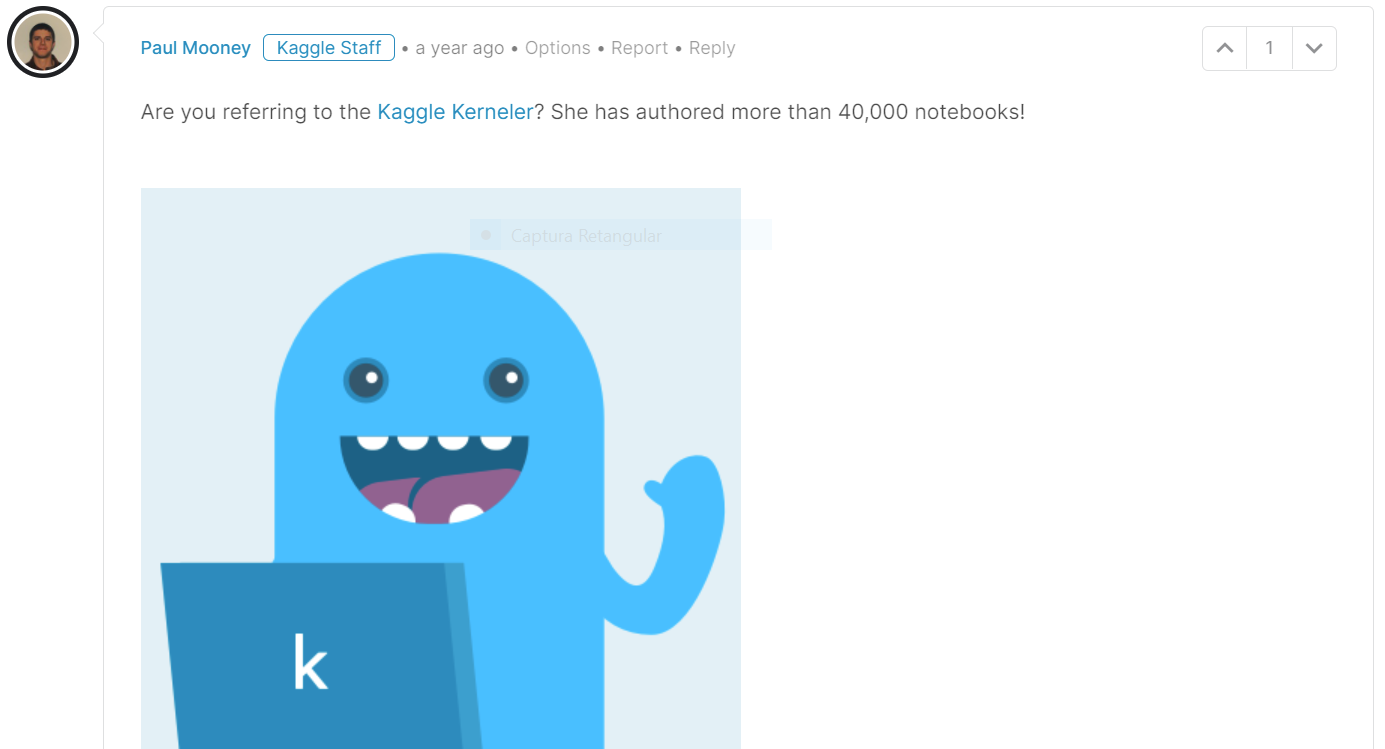

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

if country not in df[df.columns[3]].unique():
    raise ValueError(f'{country} not found in the list')
df['country_agg'] = np.where(df[df.columns[3]]==country,country,'Others')

#Demographics

1. Country

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

fig = px.pie(df, df.columns[3], 
       title=f"{len(df[df[df.columns[3]]==country])*100/len(df):.2f}% of all survey respondents are from {country}", 
       hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

#Age

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

fig = px.pie(df, df.columns[1], title='56,2% of all Kagglers are less than 30 years old', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

age_pct = len(df[(df[df.columns[3]]==country) & (df[df.columns[1]].isin(['18-21','22-24','25-29']))])*100/len(df[df[df.columns[3]]==country])
if age_pct < 56:
    title = f"{country} is older, with {age_pct:.0f}% of Kagglers being under under 30"
elif age_pct > 56:
    title = f"{country} is younger, with {age_pct:.0f}% of Kagglers being under under 30"
else:
    title = f"{age_pct:.0f}% of Kagglers from {country} are also under 30"
fig = px.pie(df[df[df.columns[3]]==country], df.columns[1], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

df['age1'] = df.iloc[:,1].str.split('-').str[0]
df['age1'].replace('70+','70', inplace=True)
df['age2'] = df.iloc[:,1].str.split('-').str[1]
df['age1'] = df.age1.astype('int')
df.age2.fillna(70, inplace=True)
df['age2'] = df.age2.astype('int')
df['age'] = (df.age1+df.age2)/2

global_median = df.age.mean()
country_median = df[df.country_agg==country].age.mean()

if country_median <= global_median:
    title = f"With an average age of {country_median:.0f},<br>Kagglers from {country} are generally {global_median - country_median:.0f} years younger than the average Kaggler"
else:
    title = f"With an average age of {country_median:.0f},<br>Kagglers from {country} are generally {country_median - global_median:.0f} years younger than the average Kaggler"

loc = df.groupby(df.columns[3]).age.mean().sort_values(ascending=False).index.to_list().index(country)
color = ['#636EFA']*len(df.groupby(df.columns[3]).age.mean().sort_values(ascending=False).index)
color[loc] = 'orange'

fig = go.Figure(data=[go.Bar(x=df.groupby(df.columns[3]).age.mean().sort_values(ascending=False).index
       , y=df.groupby(df.columns[3]).age.mean().sort_values(ascending=False)
            , marker_color=color)])

fig.update_layout(
    shapes=[
    dict(
      type= 'line',
      yref= 'y', y0= global_median, y1= global_median,
      xref= 'x', x0= -0.5, x1= len(df.groupby(df.columns[3]).age)-0.5
    )],
    title=title,
    xaxis_title=None,
    yaxis_title='Age')

fig.add_annotation(x=len(df.groupby(df.columns[3]).age)*0.95, y=global_median, xshift=-20, yshift=10,
            text="Global Average",
            showarrow=False)
fig.show()

fig = go.Figure(data=[
    go.Bar(name=country, y=df[df.country_agg==country][df.columns[1]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df[df.country_agg=='Others'][df.columns[1]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'Age distribution of Kagglers from {country} compared to others',
    xaxis_title='Age',
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(12)],
        ticktext = df[df.columns[1]].sort_values().unique()
    )
)

fig.show()

#Gender diversity

In [ ]:
print(f"Genders reported by survey respondents from {country}: {set(df[df.iloc[:,3]==country][df.columns[2]])}")

In [ ]:
# Select the gender you would like to see detailed stats about
gender = 'Nonbinary'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

gndr_pct = len(df[df[df.columns[2]]==gender])*100/len(df)
fig = px.pie(df, df.columns[2], title=f"{gndr_pct:.2f}% of all survey respondents identified as '{gender}'", hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
    
df_all = df.groupby(df.columns[3])[df.columns[2]].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))[:,gender].sort_values(ascending=False)

if country in df_all.index:
    country_avg = df_all[country]
    global_avg = len(df[df[df.columns[2]]==gender])*100/len(df)

    if country_avg > global_avg:
        title=f"In {country}, this percentage increases to {country_avg:.2f}%"
    else:
        title=f"In {country}, this percentage decreases to {country_avg:.2f}%"

    loc = df_all.index.to_list().index(country)
    color = ['#636EFA']*len(df_all.index)
    color[loc] = 'orange'

    fig = go.Figure(data=[go.Bar(x=df_all.index, y=df_all.values, marker_color=color)])
    fig.update_layout(
        shapes=[
            dict(
              type= 'line',
              yref= 'y', y0= global_avg, y1= global_avg,
              xref= 'x', x0= -0.5, x1= len(df_all.index)-0.5
            )],
        title=title,
        xaxis_title=None,
        yaxis_title='Percentage')
    fig.add_annotation(x=len(df_all.index)*0.95, y=global_avg, xshift=-20, yshift=10,
                text="Global Average",
                showarrow=False)
    fig.show()

    categories = sorted(df.iloc[:,2].unique())
    df_country_gender = df[df.country_agg==country].iloc[:,2].value_counts(normalize=True).sort_index()
    df_other_platform = df[df.country_agg=='Others'].iloc[:,2].value_counts(normalize=True).sort_index()

    fig = go.Figure(data=[
        go.Bar(name=country, x=categories, y=df_country_gender.values*100),
        go.Bar(name='Others', x=categories, y=df_other_platform.values*100)
    ])
    # Change the bar mode
    fig.update_layout(
        title=f'Gender of respondents from {country} compared to Other countries',
        xaxis_title=None,
        yaxis_title='Percentage',
        xaxis={'categoryorder':'array',
               'categoryarray':categories}
    )
    fig.show()

else:
    print(f"Nobody from {country} identified as {gender}")

#Background

4. Academic qualification

Only includes respondents who answered the question "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_academic = df[(df[df.columns[4]]!='I prefer not to answer') & (~df[df.columns[4]].isna())]

fig = px.pie(df_academic, df_academic.columns[4], 
             title="Surprisingly, globally more Kagglers reported having a Master's degree (41%)<br>than a Bachelor's (36%)", hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)
fig.show()

most_comm = df_academic[df_academic.iloc[:,3]==country].iloc[:,4].value_counts(normalize=True)[[0]]
if most_comm.index[0] == "Master's degree":
    title = f"The same trend is observed in {country},<br>with {most_comm[0]*100:.0f}% respondents reporting having a Master's degree"
else:
    title = f"However, in the case of {country},<br>more respondents reported having a {most_comm.index[0]} at {most_comm[0]*100:.0f}%"
    
fig = px.pie(df_academic[df_academic.iloc[:,3]==country], df_academic.columns[4], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)
fig.show()

categories = ['No formal education past high school',
             'Some college/university study without earning a bachelor’s degree',
             'Professional degree',
             'Bachelor’s degree',
             'Master’s degree',
             'Doctoral degree']

df_country_agg = df[df.country_agg==country].iloc[:,4].value_counts(normalize=True)
df_country_agg.index = pd.Categorical(df_country_agg.index, categories)
df_country_agg.sort_index(inplace=True)

df_others_agg = df[df.country_agg=='Others'].iloc[:,4].value_counts(normalize=True)
df_others_agg.index = pd.Categorical(df_others_agg.index, categories)
df_others_agg.sort_index(inplace=True)

fig = go.Figure(data=[
    go.Bar(name=country, x=categories, y=df_country_agg.values*100),
    go.Bar(name='Others', x=categories, y=df_others_agg.values*100)
])
# Change the bar mode
fig.update_layout(
    title=f'Academic Qualification of respondents from {country} compared to Other countries',
    xaxis_title=None,
    yaxis_title='Percentage'
)
fig.show()

#Job title

Only includes respondents who answered the question "Select the title most similar to your current role (or most recent title if retired)"

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_job = df[~df[df.columns[5]].isna()]
print(f"Job titles reported by survey respondents from {country}: {set(df_job[df_job.iloc[:,3]==country][df_job.columns[5]])}")

In [ ]:
# Enter the job-title you want to compare on
job = "Currently not employed"

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

fig = px.pie(df_job, df_job.columns[5], title='Globally, 27% Kagglers are students, followed by 14% being Data Scientists', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)
fig.show()

df_country_job = df_job[df_job.iloc[:,3]==country].iloc[:,5].value_counts(normalize=True)
com_job = df_country_job[[0]].index[0]
if com_job=='Student':
    title = f"For {country} too, most Kagglers are {com_job}s ({df_country_job[0]*100:.0f}%), followed by {df_country_job[[1]].index[0]}s ({df_country_job[1]*100:.0f}%)"
else:
    title = f"However, for {country}, most Kagglers are {com_job}s ({df_country_job[0]*100:.0f}%), followed by {df_country_job[[1]].index[0]}s ({df_country_job[1]*100:.0f}%)"

fig = px.pie(df_job[df_job.iloc[:,3]==country], df_job.columns[5], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)
fig.show()

df_all = df.groupby(df.columns[3])[df.columns[5]].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))[:,job].sort_values(ascending=False)
country_avg = df_all[country]
global_avg = len(df[df[df.columns[5]]==job])*100/len(df)

loc = df_all.index.to_list().index(country)
color = ['#636EFA']*len(df_all.index)
color[loc] = 'orange'

fig = go.Figure(data=[go.Bar(x=df_all.index, y=df_all.values, marker_color=color)])

fig.update_layout(
    shapes=[
    dict(
      type= 'line',
      yref= 'y', y0= global_avg, y1= global_avg,
      xref= 'x', x0= -0.5, x1= len(df_all.index)-0.5
    )],
    title=f"{country_avg:.0f}% of Kagglers from {country} reported their job-title as \'{job}\',<br>compared to the global average of {global_avg:.0f}%",
    xaxis_title=None,
    yaxis_title='Percentage',)

fig.add_annotation(x=len(df_all.index), y=global_avg, xshift=-60, yshift=10,
            text="Global Average",
            showarrow=False)

fig.show()

#Coding Experience

Only includes respondents who answered the question "For how many years have you been writing code and/or programming?"

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_coding = df[~df[df.columns[6]].isna()]

fig = px.pie(df_coding, df_coding.columns[6], title='65% of all survey respondents have been coding for less than 5 years', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

country_coding_exp = len(df_coding[(df_coding[df_coding.columns[3]]==country) & (df_coding[df_coding.columns[6]].isin(['3-5 years','< 1 years','1-2 years']))])*100/len(df_coding[df_coding[df_coding.columns[3]]==country])
if country_coding_exp > 65:
    title = f"For {country}, this percentage increases to {country_coding_exp:.0f}%"
elif country_coding_exp < 65:
    title = f"For {country}, this percentage decreases to {country_coding_exp:.0f}%" 
else:
    title = f"At {country_coding_exp:.0f}%, it is the same for {country} too<br>The average Kaggler from {country} about the same coding experience as the global average"
fig = px.pie(df_coding[df_coding[df_coding.columns[3]]==country], df_coding.columns[6], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

df_coding[df_coding.columns[6]] = df_coding[df_coding.columns[6]].replace('< 1 years','0-1 years').replace('I have never written code','0-0').apply(lambda x: x.split()[0])
df_coding['code1'] = df_coding.iloc[:,6].str.split('-').str[0].replace('20+','20').astype('int')
df_coding['code2'] = df_coding.iloc[:,6].str.split('-').str[1].fillna('20').astype('int')
df_coding.groupby([df_coding.columns[6]]+['code1','code2']).size()
df_coding['code'] = (df_coding.code1+df_coding.code2)/2

global_median = df_coding.code.mean()
country_median = df_coding[df_coding.country_agg==country].code.mean()

if country_median <= global_median:
    title = f"The average Kaggler from {country} has been coding for {country_median:.1f} years,<br>less than the global average of {global_median:.1f} years"
else:
    title = f"The average Kaggler from {country} has been coding for {country_median:.1f} years,<br>more than the global average of {global_median:.1f} years"

loc = df_coding.groupby(df_coding.columns[3]).code.mean().sort_values(ascending=False).index.to_list().index(country)
color = ['#636EFA']*len(df_coding.groupby(df_coding.columns[3]).code.mean().sort_values(ascending=False).index)
color[loc] = 'orange'

fig = go.Figure(data=[go.Bar(x=df_coding.groupby(df_comp.columns[3]).code.mean().sort_values(ascending=False).index
       , y=df_coding.groupby(df_coding.columns[3]).code.mean().sort_values(ascending=False)
            , marker_color=color)])

fig.update_layout(
    shapes=[
    dict(
      type= 'line',
      yref= 'y', y0= global_median, y1= global_median,
      xref= 'x', x0= -0.5, x1= len(df_coding.groupby(df_coding.columns[3]).code)-0.5
    )],
    title=title,
    xaxis_title=None,
    yaxis_title='Average coding experience')

fig.add_annotation(x=len(df_coding.groupby(df.columns[3]).code)*0.95, y=global_median, xshift=-20, yshift=10,
            text="Global Average",
            showarrow=False)
fig.show()

categories = ['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']

df_country_agg = df[df.country_agg==country].iloc[:,6].value_counts(normalize=True)
df_country_agg.index = pd.Categorical(df_country_agg.index, categories)
df_country_agg.sort_index(inplace=True)

df_others_agg = df[df.country_agg=='Others'].iloc[:,6].value_counts(normalize=True)
df_others_agg.index = pd.Categorical(df_others_agg.index, categories)
df_others_agg.sort_index(inplace=True)

fig = go.Figure(data=[
    go.Bar(name=country, x=categories, y=df_country_agg.values*100),
    go.Bar(name='Others', x=categories, y=df_others_agg.values*100)
])
# Change the bar mode
fig.update_layout(
    title=f'Coding Experience of respondents from {country} compared to Other countries',
    xaxis_title=None,
    yaxis_title='Percentage'
)
fig.show()

#Coding preferences

8. Programming language

Only includes respondents who chose atleast one option for the question "What programming languages do you use on a regular basis?"

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

programming_cols = [col for col in df.columns 
                    if 'What programming languages do you use on a regular basis?' in col]
df_programming = df.copy()
mapper = [col.split('-')[-1].lstrip() for col in programming_cols]
mapping_dict = dict(zip(programming_cols,mapper))
df_programming = df_programming[programming_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_programming.dropna(how='all', subset=mapper, inplace=True)
df_programming.drop(columns=["None"], inplace=True)

fig = px.bar(df_programming[df_programming.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'87% of all respondents use Python on a regular basis',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_programming[df_programming.iloc[:,-1]==country][df_programming.columns[:-2]].count().sort_values(ascending=False)
pop_lang = country_most_pop.index[0]
most_pop_pct = country_most_pop[0]*100/len(df_programming[df_programming.iloc[:,-1]==country])
if pop_lang=='Python':
    if most_pop_pct > 87:
        title = f'{pop_lang} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_lang} remains the most popular programming language in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_lang} is more popular,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_programming[df_programming.iloc[:,-1]==country][df_programming.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#IDE

Only includes respondents who chose atleast one option for the question 'Which of the following integrated development environments (IDE's) do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

ide_cols = [col for col in df.columns 
            if "Which of the following integrated development environments (IDE's) do you use on a regular basis?" in col]
df_ide = df.copy()
mapper = [col.split('-')[-1].lstrip() for col in ide_cols]
mapping_dict = dict(zip(ide_cols,mapper))
df_ide = df_ide[ide_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_ide.dropna(how='all', subset=mapper, inplace=True)
#df_ide.drop(columns=['Click to write Choice 13','None'], inplace=True)
df_ide.rename(columns={'Jupyter (JupyterLab, Jupyter Notebooks, etc) ':'Jupyter'}, inplace=True)

fig = px.bar(df_ide[df_ide.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'64% of all respondents use Jupyter',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_ide[df_ide.iloc[:,-1]==country][df_ide.columns[:-2]].count().sort_values(ascending=False)
pop_ide = country_most_pop.index[0]
most_pop_pct = country_most_pop[0]*100/len(df_ide[df_ide.iloc[:,-1]==country])
if pop_ide=='Jupyter':
    if most_pop_pct > 64:
        title = f'{pop_ide} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_ide} remains the most popular IDE in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_ide} is more,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_ide[df_ide.iloc[:,-1]==country][df_ide.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Hosted Notebooks

Only includes respondents who chose atleast one option for the question 'Which of the following hosted notebook products do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

nb_cols = [col for col in df.columns 
           if "Which of the following hosted notebook products do you use on a regular basis?" in col]
df_nb = df.copy()
mapper = [col.split('-')[-1].lstrip() for col in nb_cols]
mapping_dict = dict(zip(nb_cols,mapper))
df_nb = df_nb[nb_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_nb.dropna(how='all', subset=mapper, inplace=True)
df_nb.drop(columns=['None'], inplace=True)

fig = px.bar(df_nb[df_nb.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'37% of all respondents use Colab Notebooks',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_nb[df_nb.iloc[:,-1]==country][df_nb.columns[:-2]].count().sort_values(ascending=False)
pop_nb = country_most_pop.index[0]
most_pop_pct = country_most_pop[0]*100/len(df_nb[df_nb.iloc[:,-1]==country])
if pop_nb=='Colab Notebooks':
    if most_pop_pct > 37:
        title = f'{pop_nb} are even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis'
    else:
        title = f'{pop_nb} remain the most popular hosted notebooks in {country} too,<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis'
else:
    title = f"However, in {country}, {pop_nb} are more popular,<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis"

fig = px.bar(df_nb[df_nb.iloc[:,-1]==country][df_nb.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Data Visualization Library

Only includes respondents who chose atleast one option for the question 'What data visualization libraries or tools do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

viz_cols = [col for col in df.columns 
           if "What data visualization libraries or tools do you use on a regular basis?" in col]
df_viz = df.copy()
mapper = [col.split('-')[-1].strip() for col in viz_cols]
mapping_dict = dict(zip(viz_cols,mapper))
df_viz = df_viz[viz_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_viz.dropna(how='all', subset=mapper, inplace=True)
df_viz.drop(columns=['None'], inplace=True)

fig = px.bar(df_viz[df_viz.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'75% of all respondents use Matplotlib',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_viz[df_viz.iloc[:,-1]==country][df_viz.columns[:-2]].count().sort_values(ascending=False)
pop_viz = country_most_pop.index[0]
most_pop_pct = country_most_pop[0]*100/len(df_viz[df_viz.iloc[:,-1]==country])
if pop_viz=='Matplotlib':
    if most_pop_pct > 75:
        title = f'{pop_viz} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_viz} remains the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_viz} is popular,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_viz[df_viz.iloc[:,-1]==country][df_viz.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Machine Learning Frameworks

Only includes respondents who chose atleast one option for the question 'Which of the following machine learning frameworks do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

ml_cols = [col for col in df.columns 
           if "Which of the following machine learning frameworks do you use on a regular basis?" in col]
df_ml = df.copy()
mapper = [col.split('-')[-1].strip() for col in ml_cols]
mapper[0]='Scikit-learn'
mapping_dict = dict(zip(ml_cols,mapper))
df_ml = df_ml[ml_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_ml.dropna(how='all', subset=mapper, inplace=True)
df_ml.drop(columns=['None'], inplace=True)

fig = px.bar(df_ml[df_ml.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'72% of all respondents use Scikit-learn',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_ml[df_ml.iloc[:,-1]==country][df_ml.columns[:-2]].count().sort_values(ascending=False)
pop_ml = country_most_pop.index[0]
most_pop_pct = country_most_pop[0]*100/len(df_ml[df_ml.iloc[:,-1]==country])
if pop_ml=='Scikit-learn':
    if most_pop_pct > 72:
        title = f'{pop_ml} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_ml} remains the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_ml} is popular,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_ml[df_ml.iloc[:,-1]==country][df_ml.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Machine Learning Algorithms

Only includes respondents who chose atleast one option for the question 'Which of the following ML algorithms do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

ml_cols = [col for col in df.columns 
           if "Which of the following ML algorithms do you use on a regular basis?" in col]
df_ml = df.copy()
mapper = [col.split('-')[-1].strip() for col in ml_cols]
mapper[9]='Transformer Networks (BERT, gpt-3, etc)'
mapping_dict = dict(zip(ml_cols,mapper))
df_ml = df_ml[ml_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_ml.dropna(how='all', subset=mapper, inplace=True)
df_ml.drop(columns=['None'], inplace=True)

fig = px.bar(df_ml[df_ml.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'76% of all respondents use Linear or Logistic Regression',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_ml[df_ml.iloc[:,-1]==country][df_ml.columns[:-2]].count().sort_values(ascending=False)
pop_ml = country_most_pop.index[0]
most_pop_pct = country_most_pop[0]*100/len(df_ml[df_ml.iloc[:,-1]==country])
if pop_ml=='Linear or Logistic Regression':
    if most_pop_pct > 76:
        title = f'{pop_ml} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_ml} remains the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_ml} is popular,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_ml[df_ml.iloc[:,-1]==country][df_ml.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Computer Vision Methods

Only includes respondents who chose atleast one option for the question 'Which categories of computer vision methods do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

cv_cols = [col for col in df.columns 
           if "Which categories of computer vision methods do you use on a regular basis?" in col]
df_cv = df.copy()
mapper = [col.split('- ',maxsplit=2)[2] for col in cv_cols]
mapping_dict = dict(zip(cv_cols,mapper))
df_cv = df_cv[cv_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_cv.dropna(how='all', subset=mapper, inplace=True)
df_cv.drop(columns=['None'], inplace=True)

fig = px.bar(df_cv[df_cv.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'59% of all respondents use Image classification and other general purpose networks',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_cv[df_cv.iloc[:,-1]==country][df_cv.columns[:-2]].count().sort_values(ascending=False)
pop_cv = country_most_pop.index[0]
if '(' in pop_cv:
    pop_cv = pop_cv.split('(')[0].strip()
most_pop_pct = country_most_pop[0]*100/len(df_cv[df_cv.iloc[:,-1]==country])
if pop_cv=='Image classification and other general purpose networks':
    if most_pop_pct > 59:
        title = f'{pop_cv} are even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis'
    else:
        title = f'{pop_cv} remain the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis'
else:
    title = f"However, in {country}, {pop_cv} are popular,<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis"

fig = px.bar(df_cv[df_cv.iloc[:,-1]==country][df_cv.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#NLP Methods

Only includes respondents who chose atleast one option for the question 'Which of the following natural language processing (NLP) methods do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

nlp_cols = [col for col in df.columns 
           if "Which of the following natural language processing (NLP) methods do you use on a regular basis?" in col]
df_nlp = df.copy()
mapper = [col.split('- ',maxsplit=2)[2] for col in nlp_cols]
mapping_dict = dict(zip(nlp_cols,mapper))
df_nlp = df_nlp[nlp_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_nlp.dropna(how='all', subset=mapper, inplace=True)
df_nlp.drop(columns=['None'], inplace=True)

fig = px.bar(df_nlp[df_nlp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'55% of all respondents use Word embeddings/vectors',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_nlp[df_nlp.iloc[:,-1]==country][df_nlp.columns[:-2]].count().sort_values(ascending=False)
pop_nlp = country_most_pop.index[0]
if '(' in pop_nlp:
    pop_nlp = pop_nlp.split('(')[0].strip()
most_pop_pct = country_most_pop[0]*100/len(df_nlp[df_nlp.iloc[:,-1]==country])
if pop_nlp.strip()=='Word embeddings/vectors':
    if most_pop_pct > 55:
        title = f'{pop_nlp} are even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis'
    else:
        title = f'{pop_nlp} remain the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis'
else:
    title = f"However, in {country}, {pop_nlp} are popular,<br>with {most_pop_pct:.0f}% of respondents using them on a regular basis"

fig = px.bar(df_nlp[df_nlp.iloc[:,-1]==country][df_nlp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Cloud Computing Platforms

Only includes respondents who chose atleast one option for the question 'Which of the following cloud computing platforms do you use on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

ccp_cols = [col for col in df.columns 
           if "Which of the following cloud computing platforms do you use on a regular basis?" in col]
df_ccp = df.copy()
mapper = [col.split('- ',maxsplit=2)[2] for col in ccp_cols]
mapping_dict = dict(zip(ccp_cols, mapper))
df_ccp = df_ccp[ccp_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_ccp.dropna(how='all', subset=mapper, inplace=True)
df_ccp.drop(columns=['None'], inplace=True)

fig = px.bar(df_ccp[df_ccp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'41% of all respondents use AWS',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_ccp[df_ccp.iloc[:,-1]==country][df_ccp.columns[:-2]].count().sort_values(ascending=False)
pop_ccp = country_most_pop.index[0].strip()
if '(' in pop_ccp:
    pop_ccp = pop_ccp.split('(')[0].strip()
most_pop_pct = country_most_pop[0]*100/len(df_ccp[df_ccp.iloc[:,-1]==country])
if pop_ccp == 'Amazon Web Services (AWS)':
    if most_pop_pct > 41:
        title = f'{pop_ccp} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_ccp} remains the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_ccp} is popular,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_ccp[df_ccp.iloc[:,-1]==country][df_ccp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Cloud Computing Products

Only includes respondents who chose atleast one option for the question 'Do you use any of the following cloud computing products on a regular basis?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

ccp_cols = [col for col in df.columns 
           if "Do you use any of the following cloud computing products on a regular basis?" in col]
df_ccp = df.copy()
mapper = [col.split('- ',maxsplit=2)[2] for col in ccp_cols]
mapping_dict = dict(zip(ccp_cols, mapper))
df_ccp = df_ccp[ccp_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_ccp.dropna(how='all', subset=mapper, inplace=True)
df_ccp.drop(columns=['No / None'], inplace=True)

fig = px.bar(df_ccp[df_ccp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'36% of all respondents use Amazon EC2',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_ccp[df_ccp.iloc[:,-1]==country][df_ccp.columns[:-2]].count().sort_values(ascending=False)
pop_ccp = country_most_pop.index[0].strip()
if '(' in pop_ccp:
    pop_ccp = pop_ccp.split('(')[0].strip()
most_pop_pct = country_most_pop[0]*100/len(df_ccp[df_ccp.iloc[:,-1]==country])
if pop_ccp == 'Amazon EC2':
    if most_pop_pct > 36:
        title = f'{pop_ccp} is even more popular in {country},<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
    else:
        title = f'{pop_ccp} remains the most popular in {country} too,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis'
else:
    title = f"However, in {country}, {pop_ccp} is popular,<br>with {most_pop_pct:.0f}% of respondents using it on a regular basis"

fig = px.bar(df_ccp[df_ccp.iloc[:,-1]==country][df_ccp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Workplace

Size

Only includes respondents who answered the question 'What is the size of the company where you are employed?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_wp_size = df[~df.iloc[:,107].isna()]

fig = px.pie(df_wp_size, df_wp_size.columns[107], title='51% of all Kagglers work in companies with less than 250 employees', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

size_pct = len(df_wp_size[(df_wp_size[df_wp_size.columns[3]]==country) & (df_wp_size[df_wp_size.columns[107]].isin(['0-49 employees','50-249 employees']))])*100 \
/len(df_wp_size[df_wp_size[df_wp_size.columns[3]]==country])
if size_pct > 51:
    title = f"For {country}, this percentage increases to {size_pct:.0f}%<br>Kagglers from {country} tend to work in smaller companies"
elif size_pct < 51:
    title = f"For {country}, this percentage decreases to {size_pct:.0f}%<br>Kagglers from {country} tend to work in larger companies"
else:
    title = f"At {size_pct:.0f}%, it is the same for {country} too"
fig = px.pie(df_wp_size[df_wp_size[df_wp_size.columns[3]]==country], df_wp_size.columns[107], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

fig = go.Figure(data=[
    go.Bar(name=country, y=df_wp_size[df_wp_size.country_agg==country][df_wp_size.columns[107]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df_wp_size[df_wp_size.country_agg=='Others'][df_wp_size.columns[107]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'Workplace size of Kagglers from {country} compared to others',
    xaxis_title=None,
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(5)],
        ticktext = df_wp_size[df_wp_size.columns[107]].sort_values().unique()
    )
)

fig.show()

#Data Science Team Size

Only includes respondents who answered the question 'Approximately how many individuals are responsible for data science workloads at your place of business?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_dsts_size = df[~df.iloc[:,108].isna()]

fig = px.pie(df_dsts_size, df_dsts_size.columns[108], 
             title='60% of all Kagglers work in companies with less than 5 individuals handling Data Science workloads', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()


size_pct = len(df_dsts_size[(df_dsts_size[df_dsts_size.columns[3]]==country) & (df_dsts_size[df_wp_size.columns[108]].isin(['0','1-2', '3-4']))])*100 \
/len(df_dsts_size[df_dsts_size[df_dsts_size.columns[3]]==country])
if size_pct > 60:
    title = f"For {country}, this percentage increases to {size_pct:.0f}%<br>Kagglers from {country} work in companies with smaller Data Science teams"
elif size_pct < 60:
    title = f"For {country}, this percentage decreases to {size_pct:.0f}%<br>Kagglers from {country} work in companies with larger Data Science teams"
else:
    title = f"At {size_pct:.0f}%, it is the same for {country} too"
fig = px.pie(df_dsts_size[df_dsts_size[df_dsts_size.columns[3]]==country], df_dsts_size.columns[108], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

fig = go.Figure(data=[
    go.Bar(name=country, y=df_dsts_size[df_dsts_size.country_agg==country][df_dsts_size.columns[108]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df_dsts_size[df_dsts_size.country_agg=='Others'][df_dsts_size.columns[108]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'Company Data Science Team size of Kagglers from {country} compared to others',
    xaxis_title=None,
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(7)],
        ticktext = df_dsts_size[df_dsts_size.columns[108]].sort_values().unique()
    )
)

fig.show()

#Machine Learning Adoption at Work

Only includes respondents who answered the question 'Does your current employer incorporate machine learning methods into their business?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_mla = df[~df.iloc[:,109].isna()]

fig = px.pie(df_mla, df_mla.columns[109], 
             title='20% of all Kagglers work in companies which don\'t use ML models', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)
fig.show()

size_pct = len(df_mla[(df_mla[df_mla.columns[3]]==country) & 
                      (df_mla[df_mla.columns[109]].isin(['No (we do not use ML methods)']))])*100 \
/len(df_mla[df_mla[df_mla.columns[3]]==country])
if size_pct > 20:
    title = f"For {country}, this percentage increases to {size_pct:.0f}%<br>Less Kagglers from {country} work in a company using ML models"
elif size_pct < 20:
    title = f"For {country}, this percentage decreases to {size_pct:.0f}%<br>More Kagglers from {country} work in a company using ML models"
else:
    title = f"At {size_pct:.0f}%, it is the same for {country} too"
fig = px.pie(df_mla[df_mla[df_mla.columns[3]]==country], df_mla.columns[109], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', showlegend=False)
fig.show()

fig = go.Figure(data=[
    go.Bar(name=country, y=df_mla[df_mla.country_agg==country][df_mla.columns[109]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df_mla[df_mla.country_agg=='Others'][df_mla.columns[109]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'ML adoption in workplaces of Kagglers from {country} compared to others',
    xaxis_title=None,
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(7)],
        ticktext = df_mla[df_mla.columns[109]].sort_values().unique()
    )
)

fig.show()

#Role at Work

Only includes respondents who chose atleast one option for the question 'Select any activities that make up an important part of your role at work'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

role_cols = [col for col in df.columns 
           if "Select any activities that make up an important part of your role at work" in col]
df_role = df.copy()
mapper = [col.split('- ',maxsplit=2)[2] for col in role_cols]
mapping_dict = dict(zip(role_cols,mapper))
df_role = df_role[role_cols + [df.columns[3]] + ['country_agg']].rename(columns=mapping_dict)
df_role.dropna(how='all', subset=mapper, inplace=True)

fig = px.bar(df_role[df_role.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'21% of all respondents are involved in ML research',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

country_most_pop = df_role[df_role.iloc[:,-1]==country][df_role.columns[:-2]].count().sort_values(ascending=False)
research_cnt = country_most_pop.loc['Do research that advances the state of the art of machine learning']
research_pct = research_cnt*100/len(df_role[df_role.iloc[:,-1]==country])
if research_pct > 21:
    title = f'At {research_pct:.0f}%, more Kagglers from {country} are involved in ML research than the global average'
elif research_pct < 21:
    title = f'At {research_pct:.0f}%, less Kagglers from {country} are involved in ML research than the global average'
else:
    title = f'At {research_pct:.0f}%, the percentage of Kagglers {country} involved in ML research is the same as the global average'

fig = px.bar(df_role[df_role.iloc[:,-1]==country][df_role.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.show()

#Spend on ML/Cloud

Only includes respondents who answered the question 'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'

In [ ]:
#Code by https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip

df_ml_spend = df[~df.iloc[:,119].isna()]
df_ml_spend[df_ml_spend.columns[119]] = df_ml_spend[df_ml_spend.columns[119]].apply(lambda x: x.replace('$','').replace(',',''))

fig = px.pie(df_ml_spend, df_ml_spend.columns[119], 
             title='37% of all Kagglers work in companies which don\'t spend on ML/Cloud', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

size_pct = len(df_ml_spend[(df_ml_spend.iloc[:,3]==country) & (df_ml_spend.iloc[:,119]=='0 (USD)')])*100/sum(df_ml_spend.iloc[:,3]==country)

if size_pct > 37:
    title = f"For {country}, this percentage increases to {size_pct:.0f}%<br>More Kagglers from {country} work in a company not spending on ML/Cloud"
elif size_pct < 37:
    title = f"For {country}, this percentage decreases to {size_pct:.0f}%<br>Less Kagglers from {country} work in a company spending on ML/Cloud"
else:
    title = f"At {size_pct:.0f}%, it is the same for {country} too"
    
fig = px.pie(df_ml_spend[df_ml_spend[df_ml_spend.columns[3]]==country], df_ml_spend.columns[119], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

fig = go.Figure(data=[
    go.Bar(name=country, y=df_ml_spend[df_ml_spend.country_agg==country][df_ml_spend.columns[119]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df_ml_spend[df_ml_spend.country_agg=='Others'][df_ml_spend.columns[119]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'Spend on ML/Cloud in workplaces of Kagglers from {country} compared to others',
    xaxis_title=None,
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(6)],
        ticktext = df_ml_spend[df_ml_spend.columns[119]].sort_values().unique()
    )
)

fig.show()

#Acknowledgement

Siddhant Sadangi

https://www.kaggle.com/siddhantsadangi/your-country-vs-the-world-24-factors-wip